# **Bayes' Theorem**

Let's say you want to find out the probability of having a certain rare disease. We know that this disease affects 1 person out of 100,000. The precission of the test detecting the disease is 98%. If a survey was conducted, asking:

***'What is the probability of being infected when we are positivly clasified by the test?'***

Vast majority of respondents would anwser that we are ill with 98% of confidence. However, this isn't the correct answer. To find the correct one, we need to look at the situation from a slightly broader perspective..

### **Calculations**

$P(H) = \frac{1}{100000}$ - the probability of being infected.

$P(E \mid H) = \frac{98}{100}$ - the probability that you are positively clasisied by the test given that you are really infected by the diseases.

$\therefore$

$P(\neg H) = 1 - \frac{1}{100000}$ - the probability of being healthy.

$P(E \mid \neg H) = 1 - \frac{98}{100}$ - the probability that you are positively classified by the test given that you are **NOT** infected by the diseases.

---
If we revert the condition $P(E \mid H)$ we get:

$P(H \mid E)$ - the probability of being infected if you are positively classified by the test. **It is the value we are actually looking for**. It is crucial to note that: $P(E \mid H) \neq P(H \mid E)$

Now how to revert our condition? Thomas Bayes came with its fundamental formula in probability.

---

### **Bayes formula:**

$P(E \cap H) = P(H)*P(E \mid H)$

$P(E \cap H) = P(E)*P(H \mid E)$

$\therefore$

$P(H \mid E) = \frac{P(H) * P(E \mid H)}{P(E)}$

where:
- $P(E)$ is the total probability of the evidence occuring: $P(E) = P(E \cap H) + P(E \cap \neg H) = P(H) * P(E\mid H) + P(\neg H) * P(E \mid \neg H)$

In our case we can interpret it as follows:

$P(H \mid E) = \frac{Prior * PPV}{(Prior * PPV)+((1 - Prior) * FDR)}$

where:
- $Prior$ - prior probability of hypothesis
- $PPV$ - Positive Predictive Value; Precission of a test measuring the ratio between True Positives and the sum of True Positives and False Positives.
- $FDR$ - False Discovery Rate; 1 - PPV

In [1]:
def Bayes(prior_probability: float, evidence: float) -> float:
    return (prior_probability * evidence)/(prior_probability * evidence + (1 - prior_probability) * (1 - evidence))

prior_hypothesis = 1 / 100000
posterior_hypothesis = Bayes(prior_hypothesis, 0.98)

print(f"Prior probability of hypothesis (we are infected): {prior_hypothesis*100:.4}%")
print(f"Posterior probability of hypothesis (we are infected) given the evidence (positive test result): {posterior_hypothesis*100:.4f}%")

Prior probability of hypothesis (we are infected): 0.001%
Posterior probability of hypothesis (we are infected) given the evidence (positive test result): 0.0490%


As we can see we updated our prior beliefs. And actually the probability of being infected given a one positive test is considered low, so there is nothing to be worried about after performing one single test. Naturally, a new question emerges:

***'How many tests need to be conducted to achieve a minimum of 95% certainty?'***

Before taking any test the probability of being infected equals: 0.0010%
After test no. 1 we reach 0.05% of probability.
After test no. 2 we reach 2.34% of probability.
After test no. 3 we reach 54.05% of probability.
After test no. 4 we reach 98.29% of probability.
We need to take 4 tests to reach desired probability.


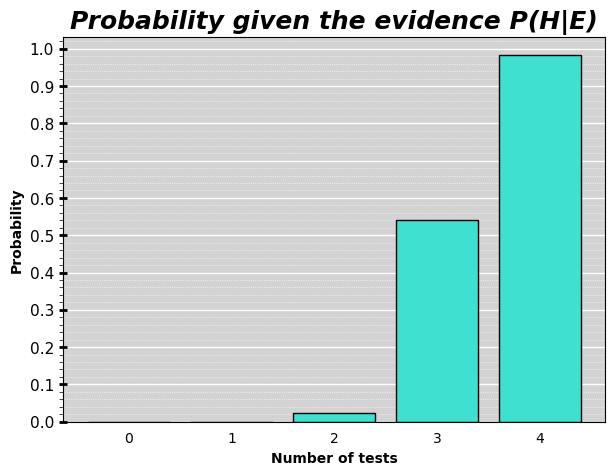

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def Bayes_rule(prior: float, evidence: float, threshold: float) -> list[float]:

    prob = prior
    posterior_probabilities = [prob]

    while prob <= threshold:
        prob = (prob * evidence)/(prob * evidence + (1 - prob) * (1 - evidence))
        posterior_probabilities.append(prob)
    
    return posterior_probabilities

probabilities = Bayes_rule(prior=1/100000, evidence=0.98, threshold=0.95)

print(f"Before taking any test the probability of being infected equals: {probabilities[0]*100:.4f}%")
for number, prob in enumerate(probabilities[1:], start=1):
    print(f"After test no. {number} we reach {prob*100:.2f}% of probability.")
print(f"We need to take {len(probabilities[1:])} tests to reach desired probability.")

plt.figure(figsize=(7,5))
ax = plt.gca()

x = [i for i in range(len(probabilities))]
ax.bar(x=x, height=probabilities, color="turquoise", edgecolor="black", linewidth=1)

ax.minorticks_on()
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.tick_params(axis="y", which='minor', width=0.5, length=3)
ax.tick_params(axis="y", which='major', width=2, length=6, direction="inout", labelsize=11)
ax.tick_params(axis="x", which='both', color="white")

ax.set_xlabel("Number of tests", fontdict={"fontweight":"bold"})
ax.set_ylabel("Probability", fontdict={"fontweight":"bold"})
ax.set_title("Probability given the evidence "+r"P(H|E)", fontsize=18, fontweight="bold", fontstyle="italic")

ax.set_facecolor("lightgrey")
ax.grid(axis="y", which='major', linewidth=1, linestyle='-', color="white")
ax.grid(axis="y", which='minor', linewidth=0.5, linestyle=':', color="white")
ax.set_axisbelow(True)

plt.show()